<a href="https://colab.research.google.com/github/CalCraven/plotting_in_python/blob/main/plot-Membrane-Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install_miniforge()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Miniforge3-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:19
🔁 Restarting kernel...


In [1]:
import condacolab
condacolab.check()

!conda install mamba -y
!mamba install anaconda-client -n base -y

!git clone https://github.com/CalCraven/plotting_in_python.git
%cd plotting_in_python

!pip install .
%cd ..
!pip install --upgrade ipykernel -y

!mamba install -c conda-forge pandas plotly matplotlib numpy openpyxl jupyterlab -y

✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mamba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    archspec-0.2.3             |     pyhd8ed1ab_0          48 KB  conda-forge
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    conda-24.7.1               |  py310hff52083_0         940 KB  conda-forge
    fmt-10.2.1                 |       h00ab1b0_0         189 KB  conda-forge
    frozendict-2.4.4           |  py310hc51659f_0          48 KB  conda-forge
    libcurl-8.8.0              |       hca28451_0         396 KB  conda-forge
    libgcc-14.1.0              |       h77fa898_1         827 KB  conda-forge
    libgcc-ng-14.1.0         

## Computer DataTypes in Python

In [2]:
# numeric types:
a = 5
print("Type of a: ", type(a))

b = 5.0
print("\nType of b: ", type(b))

c = 2 + 4j
print("\nType of c: ", type(c))


Type of a:  <class 'int'>

Type of b:  <class 'float'>

Type of c:  <class 'complex'>


In [3]:
# string types:
String1 = 'Welcome to the Geeks World'
print("String with the use of Single Quotes: ")
print(String1)
String1 = "I'm a Geek"
print("\nString with the use of Double Quotes: ")
print(String1)
print(type(String1))
String1 = '''I'm a Geek and I live in a world of "Geeks"'''
print("\nString with the use of Triple Quotes: ")
print(String1)
print(type(String1))

String1 = '''Geeks
            For
            Life'''
print("\nCreating a multiline String: ")
print(String1)

String with the use of Single Quotes: 
Welcome to the Geeks World

String with the use of Double Quotes: 
I'm a Geek
<class 'str'>

String with the use of Triple Quotes: 
I'm a Geek and I live in a world of "Geeks"
<class 'str'>

Creating a multiline String: 
Geeks 
            For 
            Life


In [4]:
# container types:
List = []
print("Initial blank List: ")
print(List)
List = ['GeeksForGeeks']
print("\nList with the use of String: ")
print(List)
List = ["Geeks", "For", "Geeks"]
print("\nList containing multiple values: ")
print(List[0])
print(List[2])
List = [['Geeks', 'For'], ['Geeks']]
print("\nMulti-Dimensional List: ")
print(List)

Initial blank List: 
[]

List with the use of String: 
['GeeksForGeeks']

List containing multiple values: 
Geeks
Geeks

Multi-Dimensional List: 
[['Geeks', 'For'], ['Geeks']]


In [ ]:
# accessing containers
List = ["Geeks", "For", "Geeks"]
print("Accessing element from the list")
print(List[0])
print(List[2])
print("Accessing element using negative indexing")
print(List[-1])
print(List[-3])

In [11]:
# Numpy (importing pacakges)
import numpy as np

List = ["Geeks", "For", "Geeks"]
Array = np.array(List)

print(Array, type(Array))
print(Array[2])

# math operations with numpy
Array = np.array([1,2,3,5])
print(Array*2)
print(Array-1)



['Geeks' 'For' 'Geeks'] <class 'numpy.ndarray'>
Geeks
[ 2  4  6 10]
[0 1 2 4]
2.75 1.48


In [13]:
# Working with functions
Array = np.array([1,2,3,5])

# manually define functions
def get_mean(values):
    current_sum = 0
    for i in values:
        current_sum = current_sum + i
    return i / len(Array)
print("Manual Mean: ", get_mean(Array))

# class functions
print("Class Mean: ", np.mean(Array), "Class STD: ", np.std(Array).round(2))

Manual Mean:  1.25
Class Mean:  2.75 Class STD:  1.48


## Working with datasets in Python

In [14]:
# colleted_data
import numpy as np
import pandas as pd

np.seed = 12345 # set controllable seed

feedA = np.array([
    0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2,
    0.3,  0.3,  0.3, 0.4, 0.4, 0.4,
    0.5, 0.5, 0.5
]) # weight percentage
feedB = 1-feedA # weight percentage
permA = np.array([
    0.8, 0.81, 0.82, 0.84, 0.85, 0.84,
    0.84, 0.88, 0.87, 0.89, 0.9,
    0.91, 0.891, 0.92, 0.91, 0.92,
]) # weight percentage
permB = 1-permA # weight percentage
feedFlow = np.random.sample(len(feedA)) * 2000
permFlow = np.random.sample(len(feedA)) * 500

rawDF = pd.DataFrame(
    data=np.array([feedA, feedB, permA, permB, feedFlow, permFlow]).T,
    columns=["feedA", "feedB", "permA", "permB", "feedFlow", "permFlow"]
)
rawDF

,feedA,feedB,permA,permB,feedFlow,permFlow
0,0.1,0.9,0.800,0.200,1677.746483,75.628729
1,0.1,0.9,0.810,0.190,700.088274,29.199221
2,0.1,0.9,0.820,0.180,712.077791,196.268061
3,0.2,0.8,0.840,0.160,531.310237,119.628091
4,0.2,0.8,0.850,0.150,539.284817,185.692770
5,0.2,0.8,0.840,0.160,302.288711,7.714689
6,0.2,0.8,0.840,0.160,128.558530,383.913473
7,0.3,0.7,0.880,0.120,939.267139,398.070181
8,0.3,0.7,0.870,0.130,922.781809,108.157196
9,0.3,0.7,0.890,0.110,1835.992194,447.039267


In [15]:
# calculate mean and std (built-in functions)
# result = rawDF.groupby(['feedA'], as_index=False).agg(
#     {'permA':['mean','std']}
# )
result = rawDF.groupby(['feedA'])['permA'].mean()
result

,permA
feedA,
0.1,0.810000
0.2,0.842500
0.3,0.880000
0.4,0.900333
0.5,0.916667


In [16]:
# use a loop to calculate all means
meansDF = pd.DataFrame()
for group in ["feedA", "feedB", "permA", "permB", "feedFlow", "permFlow"]:
    result = rawDF.groupby(['feedA'])[group].mean()
    meansDF[group] = result
meansDF

,feedA,feedB,permA,permB,feedFlow,permFlow
feedA,,,,,,
0.1,0.1,0.9,0.810000,0.190000,1029.970849,100.365337
0.2,0.2,0.8,0.842500,0.157500,375.360574,174.237256
0.3,0.3,0.7,0.880000,0.120000,1232.680381,317.755548
0.4,0.4,0.6,0.900333,0.099667,919.511672,368.816623
0.5,0.5,0.5,0.916667,0.083333,1293.029239,193.031413


In [17]:
# use a loop to calculate all standard deviations
for group in ["feedA", "feedB", "permA", "permB", "feedFlow", "permFlow"]:
    result = rawDF.groupby(['feedA'])[group].std()
    meansDF[group+"_std"] = result
meansDF

,feedA,feedB,permA,permB,feedFlow,permFlow,feedA_std,feedB_std,permA_std,permB_std,feedFlow_std,permFlow_std
feedA,,,,,,,,,,,,
0.1,0.1,0.9,0.810000,0.190000,1029.970849,100.365337,0.0,0.0,0.010000,0.010000,561.022184,86.237603
0.2,0.2,0.8,0.842500,0.157500,375.360574,174.237256,0.0,0.0,0.005000,0.005000,197.857020,157.910598
0.3,0.3,0.7,0.880000,0.120000,1232.680381,317.755548,0.0,0.0,0.010000,0.010000,522.548371,183.161390
0.4,0.4,0.6,0.900333,0.099667,919.511672,368.816623,0.0,0.0,0.009504,0.009504,378.047671,101.505405
0.5,0.5,0.5,0.916667,0.083333,1293.029239,193.031413,0.0,0.0,0.005774,0.005774,519.934939,190.435901


In [18]:
# calculate parameters (make-your own functions)
# selectivity
def selectivity(permA):
    """Calculated membrane selectivity.
    https://personalpages.manchester.ac.uk/staff/Peter.Budd/SELECTIVITY%20&%20PERMEABILITY.htm

    selectivity_AB = permeabilityA/permeabilityB

    permeabilityA = fluxA * membrane thickness / dPressure

    selectivity = fluxA / fluxB
    selectivity = permA * permFlow / (1-permA) / permFlow
    selectivity = permA / (1-permA)
    """
    return permA / (1-permA)
meansDF["selectivity"] = meansDF.apply(lambda x: selectivity(x['permA']), axis=1)
meansDF

,feedA,feedB,permA,permB,feedFlow,permFlow,feedA_std,feedB_std,permA_std,permB_std,feedFlow_std,permFlow_std,selectivity
feedA,,,,,,,,,,,,,
0.1,0.1,0.9,0.810000,0.190000,1029.970849,100.365337,0.0,0.0,0.010000,0.010000,561.022184,86.237603,4.263158
0.2,0.2,0.8,0.842500,0.157500,375.360574,174.237256,0.0,0.0,0.005000,0.005000,197.857020,157.910598,5.349206
0.3,0.3,0.7,0.880000,0.120000,1232.680381,317.755548,0.0,0.0,0.010000,0.010000,522.548371,183.161390,7.333333
0.4,0.4,0.6,0.900333,0.099667,919.511672,368.816623,0.0,0.0,0.009504,0.009504,378.047671,101.505405,9.033445
0.5,0.5,0.5,0.916667,0.083333,1293.029239,193.031413,0.0,0.0,0.005774,0.005774,519.934939,190.435901,11.000000


In [19]:
# propogate errors
def selectivity_deviation(permAstd, permAmean):
    """Calculated membrane selectivity standard deviation.

    Sources
    https://chem.libretexts.org/Bookshelves/Analytical_Chemistry/Supplemental_Modules_(Analytical_Chemistry)/Quantifying_Nature/Significant_Digits/Propagation_of_Error
    https://personalpages.manchester.ac.uk/staff/Peter.Budd/SELECTIVITY%20&%20PERMEABILITY.htm
    variables = permA, permFlow
    selectivity = "permA*permFlow/(1-permA)/permFlow"
    selectivity = permA/(1-permA)
    VAR(selectivity)/EXP(selectivity)**2 = (VAR(permA)/EXP(permA)**2) *2
    VAR(selectivity) = 2 * (VAR(permA)/EXP(permA)**2) * EXP(selectivity)**2
    VAR(X) = STD(X)**2
    STD(selectivity) = sqrt(2) * STD(permA) * EXP(selectivity) / EXP(permA)
    """

    return np.sqrt(2) * permAstd * selectivity(permAmean) / permAmean

meansDF["selectivity_std"] = meansDF.apply(lambda x: selectivity_deviation(x['permA_std'], x['permA']), axis=1)
meansDF

,feedA,feedB,permA,permB,feedFlow,permFlow,feedA_std,feedB_std,permA_std,permB_std,feedFlow_std,permFlow_std,selectivity,selectivity_std
feedA,,,,,,,,,,,,,,
0.1,0.1,0.9,0.810000,0.190000,1029.970849,100.365337,0.0,0.0,0.010000,0.010000,561.022184,86.237603,4.263158,0.074432
0.2,0.2,0.8,0.842500,0.157500,375.360574,174.237256,0.0,0.0,0.005000,0.005000,197.857020,157.910598,5.349206,0.044896
0.3,0.3,0.7,0.880000,0.120000,1232.680381,317.755548,0.0,0.0,0.010000,0.010000,522.548371,183.161390,7.333333,0.117851
0.4,0.4,0.6,0.900333,0.099667,919.511672,368.816623,0.0,0.0,0.009504,0.009504,378.047671,101.505405,9.033445,0.134862
0.5,0.5,0.5,0.916667,0.083333,1293.029239,193.031413,0.0,0.0,0.005774,0.005774,519.934939,190.435901,11.000000,0.097980


## Plot Real Data
Data collected by Matthew Vasuta for fluorinated polymer systems.

In [21]:
# Load data
import pandas as pd

df = pd.read_excel('plotting_in_python/data/7-2-24 Membrane Graphs.xlsx', header=1)
df

,% Fluor ination,Total Flux (g/(m^2×h)),Unnamed: 2,Unnamed: 3,Water Permeance (GPU),Unnamed: 5,Unnamed: 6,α,Unnamed: 8,Unnamed: 9,β,Unnamed: 11,Unnamed: 12,Percent EtOH,Unnamed: 14
0,100.0,86.8,29.2,14.60,595.6,140.7,70.35,155.2,85.7,42.85,48.5,24.6,12.30,14.3,5.3
1,94.9,57.1,18.2,9.10,407.1,86.1,43.05,174.3,32.1,16.05,54.0,9.2,4.60,11.8,1.8
2,62.3,57.4,14.7,7.35,466.9,104.9,52.45,268.7,66.2,33.10,81.0,18.9,9.45,8.3,1.8
3,37.9,77.3,4.4,2.20,457.9,10.9,5.45,87.6,11.1,5.55,29.0,3.3,1.65,19.8,1.8
4,13.8,121.5,2.0,1.00,663.6,79.1,39.55,56.0,14.0,7.00,19.4,4.6,2.30,27.3,4.4
5,9.9,138.3,18.4,9.20,838.4,72.2,36.10,68.1,9.0,4.50,23.3,2.7,1.35,23.5,2.2
6,7.2,170.6,40.7,20.35,802.4,213.0,106.50,29.1,6.1,3.05,11.4,2.0,1.00,38.7,4.0
7,0.0,2967.8,955.9,477.95,2637.4,1173.0,586.50,2.6,0.4,0.20,1.7,0.1,0.05,80.7,1.7


In [22]:
# single scatter
import plotly.io as pio
import plotly.express as px

pio.templates.default = "simple_white"
pio.renderers.default = 'iframe'
fig = px.scatter(
    df, x="% Fluor ination", y="α", color="β",
    error_y="Unnamed: 11",
)
fig.update_traces(
    marker=dict(size=16,
    line=dict(width=2,
    color='DarkSlateGrey')),
    selector=dict(mode='markers')
)
fig.show()


/var/folders/wy/fsjbkz_s10b30c6mzcw0y4jc0000gn/T/ipykernel_82613/1319401572.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


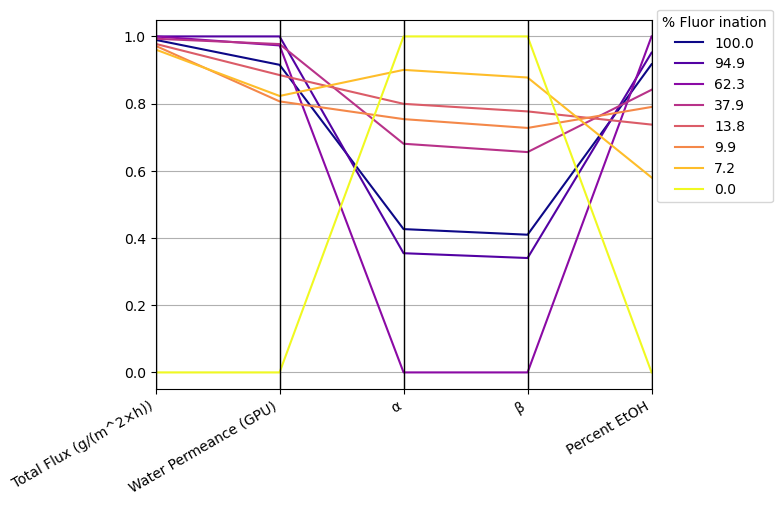

In [ ]:
# plotting multi-variate bits and bobs
# https://www.kaggle.com/code/residentmario/multivariate-plotting
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm

plot_xdata = [
    '% Fluor ination', 'Total Flux (g/(m^2×h))',
    'Water Permeance (GPU)', 'α', 'β', 'Percent EtOH'
]

normDF = df[plot_xdata[1:]].apply(lambda x: ((x.max() - x)/(x.max() - x.min())))
legend_label = '% Fluor ination'
normDF[legend_label] = df[legend_label]
cmap = cm["plasma"]
ax = parallel_coordinates(
    normDF[plot_xdata], legend_label, colormap=cmap
)
fig = ax.get_figure()
ax.get_legend().remove()

fig.legend(title=legend_label, loc="right", bbox_to_anchor=[1.1,0.7])
plt.xticks(rotation=30, ha="right")
fig.show()